In [79]:
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [80]:
data = pd.read_csv("../data/mnist_test.csv").values

In [81]:
X, y = data[:, 1:], data[:, 0]

In [82]:
pca = PCA()

pca.fit(X)

PCA()

In [83]:
pca.components_.shape

(784, 784)

In [84]:
Xmod = np.dot(X, pca.components_.T)

In [85]:
Xrev = np.dot(Xmod, pca.components_)

In [86]:
Xrev.shape

(10000, 784)

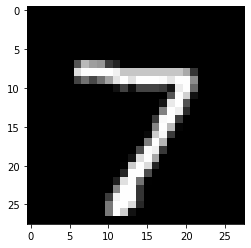

In [87]:
plt.imshow(X[0].reshape([28, 28]), cmap="gray")

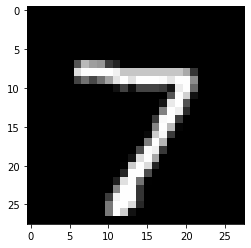

In [88]:
plt.imshow(Xrev[0].reshape([28, 28]), cmap="gray")

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.7921212121212121

In [25]:
X_train, X_test, y_train, y_test = train_test_split(Xmod, y, test_size=0.33, random_state=42)

In [26]:
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.7715151515151515

In [28]:
pca = PCA(n_components=2)
pca.fit(X)
Xmod = np.dot(X, pca.components_.T)

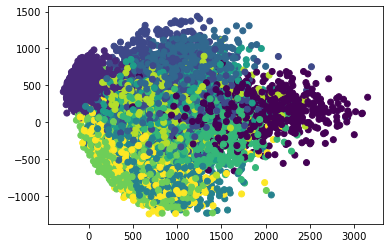

In [30]:
plt.scatter(Xmod[:, 0], Xmod[:, 1], c=y)

In [77]:

yselected = y[y<5]

Xmodselected = Xmod[[y<5]]

# plt.scatter(Xmodselected[:, 0], Xmodselected[:, 1], c=yselected)



<ipython-input-77-11f36f89c0f2>:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Xmodselected = Xmod[[y<5]]


In [78]:
X_train, X_test, y_train, y_test = train_test_split(Xmodselected, yselected, test_size=0.33, random_state=42)

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.7158018867924528

In [ ]:
import cv2

img = cv2.imread("../data/two.png")

img = cv2.resize(img, (28, 28))

gray = img.mean(axis=2)

gray.shape

plt.imshow(gray, cmap="gray")

gray = (gray > 100).astype(int)*255

plt.imshow(gray, cmap="gray")

topred = pca.transform(np.array([gray.flatten()]))

model = DecisionTreeClassifier()

model.fit(Xmodselected, yselected)

model.predict(topred)